In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import json
import re
import os

import nltk
from nltk.corpus import stopwords

import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [19]:
# Load Bing Liu's opinion word dictionary
bing_liu_opinion_words = set()  # Add the actual list of opinion words here

# Function to load opinion words from Bing Liu lexicon
def load_opinion_words(filepath):
    global bing_liu_opinion_words
    temp = pd.read_table(filepath, comment=';', header=None)[0].to_list()
    bing_liu_opinion_words = bing_liu_opinion_words.union(set(temp))


# Load opinion words
current_dir = os.getcwd()
load_opinion_words(os.path.join(current_dir, 'util/opinion-lexicon-English/negative-words.txt'))
load_opinion_words(os.path.join(current_dir, 'util/opinion-lexicon-English/positive-words.txt'))

In [22]:
# Preprocessing text
def preprocessing(text):

    # Get token of words
    doc = nlp(text)
    result = []
    for token in doc:
        t = token.lemma_.lower()

        if re.match(r'^[0-9\W]+$', t) or len(t) < 3 or t in stop_words:
            continue
        # If the token is adjective, noun, propn, or verb
        if token.pos_ in ['NOUN', 'PROPN', 'VERB']:
            result.append(t)
        # elif token.pos_ in ['ADJ', 'VERB']:
        #     result.append(t)
        # If the token is ADJ but not sentiment opinion
        elif token.pos_ in ['ADJ'] and t not in bing_liu_opinion_words:
            result.append(t)
        else:
            continue
        # result.append(t)
    return result


In [20]:
# Define the list of stopwords
stop_words = set(stopwords.words('english'))


In [21]:
# Load nlp model
nlp = spacy.load('en_core_web_sm')

# Load Model

In [14]:
with open("temp-2.json", "r") as file:
    data = json.load(file)

data

{'0': {'reviewer_id': 1,
  'review_time': '2024-09-04',
  'rating': 1,
  'review_processed': "I had a normal transaction, everyone was calm and polite, but now I don't want to eat this. I'm trying not to think about what this milky white/clear substance is all over my food, and I'm sure I'm not coming back.",
  'aspect_sentiment': [{'term': 'food',
    'class': 'negative',
    'probability': [0.9815933108329773,
     0.015454968437552452,
     0.002951699076220393],
    'context': ["I had a normal transaction, everyone was calm and polite, but now I don't want to eat this.",
     "I'm trying not to think about what this milky white/clear substance is all over my food, and I'm sure I'm not coming back."]},
   {'term': 'substance',
    'class': 'negative',
    'probability': [0.5997273921966553,
     0.004296493716537952,
     0.39597612619400024],
    'context': ["I had a normal transaction, everyone was calm and polite, but now I don't want to eat this.",
     "I'm trying not to think 

In [23]:
df = pd.DataFrame.from_dict(data, 'index')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   reviewer_id       100 non-null    int64 
 1   review_time       100 non-null    object
 2   rating            100 non-null    int64 
 3   review_processed  100 non-null    object
 4   aspect_sentiment  100 non-null    object
 5   sentiment         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 5.5+ KB
None


,reviewer_id,review_time,rating,review_processed,aspect_sentiment,sentiment
0,1,2024-09-04,1,"I had a normal transaction, everyone was calm ...","[{'term': 'food', 'class': 'negative', 'probab...",negative
1,2,2024-11-29,4,"The staff at McDonald's are friendly, accommod...","[{'term': 'fast food', 'class': 'positive', 'p...",positive
2,3,2024-11-29,1,I made a mobile order got to the speaker and c...,"[{'term': 'speaker', 'class': 'neutral', 'prob...",negative
3,4,2024-11-04,5,"Crispy chicken sandwich was delicious, and cus...","[{'term': 'sandwich', 'class': 'positive', 'pr...",positive
4,5,2024-10-04,1,I repeat my order three times in the drive thr...,"[{'term': 'fries', 'class': 'negative', 'proba...",negative


In [30]:
# Create documents
documents = df['review_processed'].values
documents = [" ".join(preprocessing(document)) for document in documents]

documents[:5]

['normal transaction want eat try think milky white substance food sure come',
 'staff mcdonald accommodate smile food atmosphere make experience many food place area',
 'make mobile order get speaker check line move leave get refund app call say get money person stick system',
 'crispy chicken sandwich customer service quick sandwich service sandwich customer service professional',
 'repeat order time drive thru manage mess suppose large meal double filet fish large fry need pay close attention order make need work drive thru']

In [38]:
# with open('documents.json', 'w') as f:
#     json.dump(documents, f, indent=4)

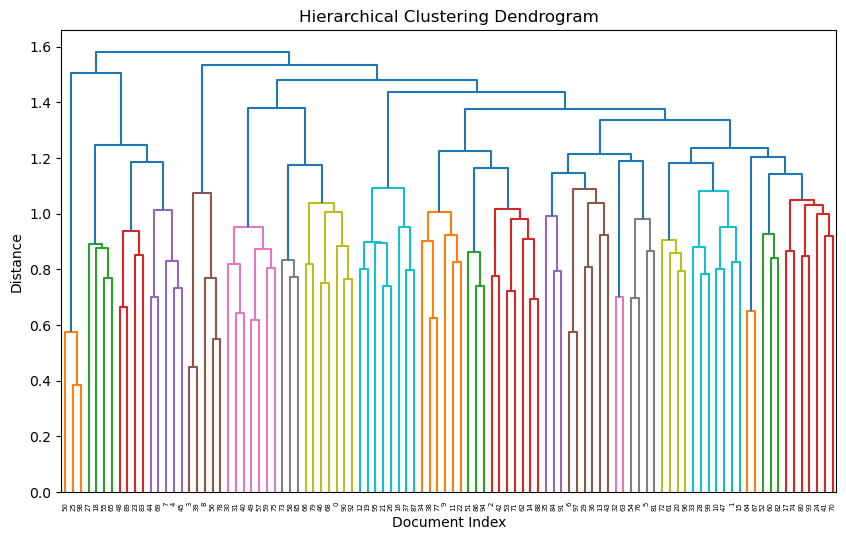

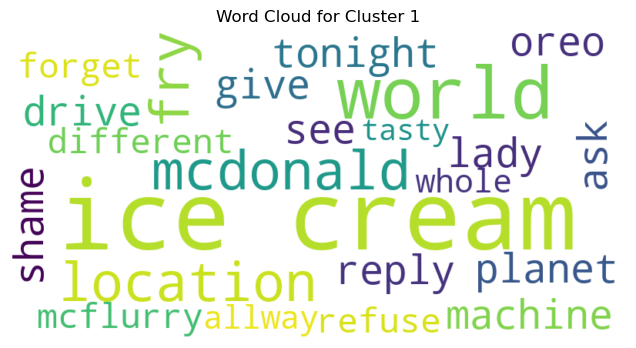

Cluster 1:
  - mcdonald ice cream machine planet ask drive ice cream lady reply ice cream shame ice cream world
  - location tonight see give oreo mcflurry different mcdonald forget refuse ice cream ice cream location
  - allway fry ice cream world whole world world fry ice cream tasty


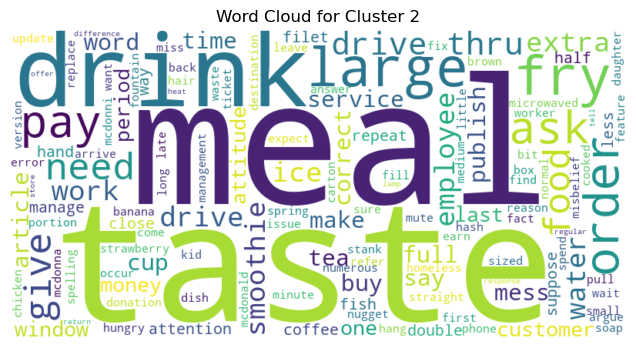

Cluster 2:
  - repeat order time drive thru manage mess suppose large meal double filet fish large fry need pay close attention order make need work drive thru
  - ask employee give large coffee ice say get large tea ice taste hand cup less half way full pay get full cup
  - buy strawberry banana smoothie hash brown smoothie taste straight ice water service smoothie taste fact buy kid
  - microwaved nugget fry minute wait ask hungry give meal pay homeless donation box drive thru
  - article update publish spring first publish version article feature correct spelling word taste error occur misbelief word taste refer food
  - drink water employee ask replace drink drink water employee customer ask drink drink drink drink
  - order large customer expect get come large arrive destination fill carton give small portion pay management need correct
  - service worker stank attitude reason work window mute attitude work mess order answer phone find long hair daughter fry extra fry miss meal
  

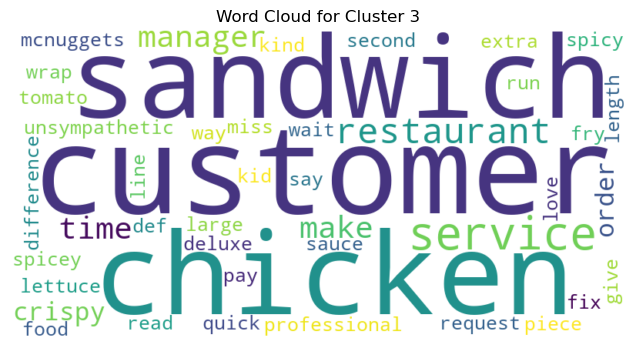

Cluster 3:
  - crispy chicken sandwich customer service quick sandwich service sandwich customer service professional
  - piece chicken miss restaurant give time extra sauce service restaurant manager unsympathetic request get chicken mcnuggets customer
  - order large fry chicken sandwich read spicey chicken sandwich say fix pay second time lettuce tomato get order spicy chicken sandwich deluxe crispy chicken sandwich
  - restaurant time line wrap def customer service food kid love customer service make difference
  - way make customer customer service manager wait length make customer manager kind restaurant run


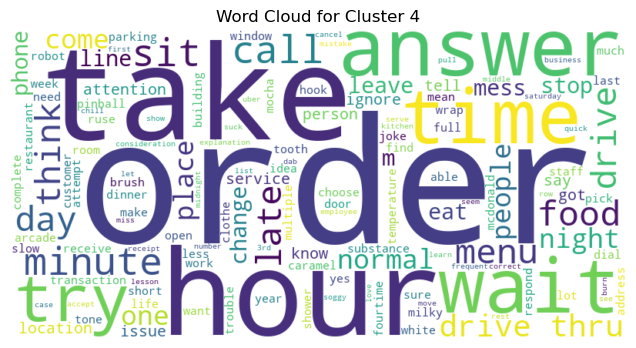

Cluster 4:
  - normal transaction want eat try think milky white substance food sure come
  - minute wait drive room temperature caramel mocha less full order order order
  - stop take order make people sit parking lot minute a.m. get order dinner multiple time leave pinball arcade wait drive thru line wait order menu change
  - take minute take order able order normal menu take minute order menu choose normal menu
  - mess order time hour answer call respond phone call mess order fourtime hour joke ruse get attention
  - last night sit drive thru hour wait get order take line wrap building get window tell take receive customer service life
  - pick food restaurant late night drive tell wait door get order wait minute one come food come take hour get
  - hour day day week mean place open hour year know find people work shower brush tooth change clothe think idea robot
  - late order person take order need slow person take much time complete order late order late
  - got order yes answe

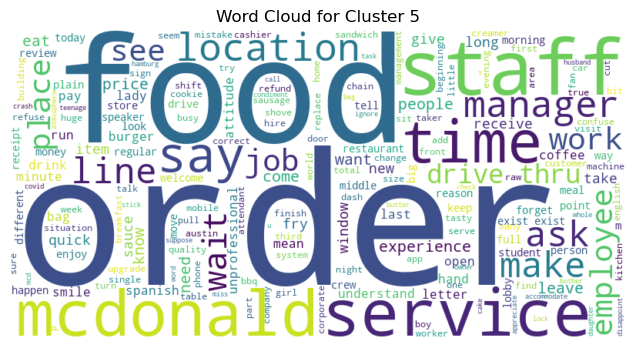

Cluster 5:
  - staff mcdonald accommodate smile food atmosphere make experience many food place area
  - make mobile order get speaker check line move leave get refund app call say get money person stick system
  - work door dash lock wait long line reason try beg open door dash refuse covid get new job
  - give location customer service experience time see review get home regular hamburg cookie bother location
  - huge fan food teenage daughter enjoy mcd staff get order enjoy appreciate quality service quality people find
  - mcdonald mcdonald say chain owner mcdonald u.s. world world food chain
  - order suppose food item drink miss food item lady ignore tell husband get finish task hand word smile
  - morning crew seem night crew whole different experience staff leave want crash car building forget mistake order single time serve
  - disappoint restaurant get full order mean receive condiment big breakfast cake butter syrup utensil egg size sausage
  - order food leave part order dr

In [36]:
# Step 1: Convert text data into a TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Step 2: Compute pairwise distances (cosine similarity)
from scipy.spatial.distance import pdist
distance_matrix = pdist(tfidf_matrix.toarray(), metric='cosine')

# Step 3: Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

# Step 4: Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=np.arange(len(documents)))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Document Index")
plt.ylabel("Distance")
plt.show()

# Step 5: Extract clusters
# Create 3 clusters
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

# Step 6: Generate word clouds for each cluster
for cluster_id in np.unique(clusters):
    cluster_docs = [documents[i] for i in range(len(documents)) if clusters[i] == cluster_id]

    # Combine all documents in the cluster
    combined_text = " ".join(cluster_docs)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(combined_text)

    # Plot the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Cluster {cluster_id}")
    plt.axis('off')
    plt.show()

    # Print cluster documents
    print(f"Cluster {cluster_id}:")
    for doc in cluster_docs:
        print(f"  - {doc}")


In [37]:
import numpy as np
from collections import defaultdict

# Step 6 continued: Extract important words for each cluster
important_words_per_cluster = defaultdict(list)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Iterate through each cluster
for cluster_id in np.unique(clusters):
    cluster_docs_indices = [i for i in range(len(documents)) if clusters[i] == cluster_id]

    # Extract the rows of the TF-IDF matrix corresponding to the cluster
    cluster_tfidf_matrix = tfidf_matrix[cluster_docs_indices]

    # Calculate the average TF-IDF score for each word in the cluster
    mean_tfidf = cluster_tfidf_matrix.mean(axis=0).A1  # Convert sparse matrix to dense array

    # Get the top N words for the cluster (e.g., top 10)
    top_n = 10
    top_indices = mean_tfidf.argsort()[-top_n:][::-1]  # Indices of the top N words, sorted by score

    # Store the top words and their scores
    important_words = [(feature_names[i], mean_tfidf[i]) for i in top_indices]
    important_words_per_cluster[cluster_id] = important_words

    # Print the important words for the cluster
    print(f"Cluster {cluster_id} Important Words:")
    for word, score in important_words:
        print(f"  - {word}: {score:.4f}")


Cluster 1 Important Words:
  - cream: 0.5196
  - ice: 0.4698
  - world: 0.2685
  - location: 0.1144
  - fry: 0.1029
  - oreo: 0.0923
  - mcflurry: 0.0923
  - mcdonald: 0.0863
  - tonight: 0.0847
  - allway: 0.0830
Cluster 2 Important Words:
  - meal: 0.1440
  - taste: 0.1357
  - large: 0.1286
  - fry: 0.1105
  - drink: 0.1059
  - pay: 0.0782
  - drive: 0.0709
  - ask: 0.0647
  - give: 0.0538
  - need: 0.0526
Cluster 3 Important Words:
  - customer: 0.3219
  - sandwich: 0.2510
  - chicken: 0.2421
  - service: 0.2175
  - restaurant: 0.1724
  - manager: 0.1170
  - make: 0.1145
  - crispy: 0.0834
  - time: 0.0808
  - def: 0.0677
Cluster 4 Important Words:
  - order: 0.1493
  - take: 0.1212
  - hour: 0.1193
  - answer: 0.0990
  - wait: 0.0759
  - drive: 0.0725
  - get: 0.0721
  - sit: 0.0719
  - try: 0.0638
  - call: 0.0614
Cluster 5 Important Words:
  - food: 0.0776
  - order: 0.0723
  - get: 0.0595
  - staff: 0.0560
  - service: 0.0521
  - mcdonald: 0.0491
  - location: 0.0350
  - time: 0